<a href="https://colab.research.google.com/github/Jeetesh-KumarM/CAPSTONE-PROJECT-1/blob/main/Copy_of_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/AlmaBetter/AirBnB/AirBnB Bookings Analysis/Airbnb NYC 2019.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

**DATA CLEANING:**
Checking whether same host id is present multiple times

In [ ]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
df['id'].duplicated().unique() #Host id dupicate has only 1 unique value i.e false. Hence no multiple data with same id exists

array([False])

In [ ]:
df['id'].isnull().unique()#No null value in id

array([False])

In [ ]:
print(df['host_name'].isnull().unique())#Host name has null values
name_null=df[df['host_name'].isnull()==True]
name_null['id'].shape[0]# 21 entries with name as null
s=df.name.fillna(df.host_id,inplace=True)#Replace the null host name with the host id
df.name.isnull().unique()

[False  True]


array([False])

In [ ]:
df1=df.copy()
def check(x):
    if 0 in x.values:
      return "0 is present"
    else:
      return "0 is absent"
#Price Values
print("Price Column")
print("\tNull values:",df1['price'].isnull().unique())
print("\t",check(df1['price']))
#Minimum Nights Values
print("\nMinimum Nights Column")
print("\tNull values:",df1['minimum_nights'].isnull().unique())
print("\t",check(df1['minimum_nights']))
#Number of Reviews Values
print("\nNumber of reviews Column")
print("\tNull values:",df1['number_of_reviews'].isnull().unique())
print('\t',check(df1['number_of_reviews']))
#Last Review Values
print("\nLast review Column")
print("\tNull values:",df1['last_review'].isnull().unique())
print("\t",check(df1['last_review']))
#df1['last_review'].fillna(0,inplace=True)
#Reviews per Month Column
print("\nReviews Per Month Column")
print("\tNull values:",df1['reviews_per_month'].isnull().unique())
print("\t",check(df1['reviews_per_month']))
df1['reviews_per_month'].fillna(0,inplace=True)

Price Column
	Null values: [False]
	 0 is present

Minimum Nights Column
	Null values: [False]
	 0 is absent

Number of reviews Column
	Null values: [False]
	 0 is present

Last review Column
	Null values: [False  True]
	 0 is absent

Reviews Per Month Column
	Null values: [False  True]
	 0 is absent


In [ ]:
df2=df1.copy()
new=df2.groupby(['neighbourhood_group','room_type']).agg({'price':"mean"})
new

price
neighbourhood_group room_type                  
Bronx               Entire home/apt  127.506596
                    Private room      66.788344
                    Shared room       59.800000
Brooklyn            Entire home/apt  178.327545
                    Private room      76.500099
                    Shared room       50.527845
Manhattan           Entire home/apt  249.239109
                    Private room     116.776622
                    Shared room       88.977083
Queens              Entire home/apt  147.050573
                    Private room      71.762456
                    Shared room       69.020202
Staten Island       Entire home/apt  173.846591
                    Private room      62.292553
                    Shared room       57.444444

In [ ]:
 new=df2.groupby(['neighbourhood_group','room_type']).agg({'neighbourhood_group':'unique','room_type':'unique','price':"mean"})
 #Include neighbourhood_group and room_type into the table


In [ ]:
df1[df1['price']==0][0:3]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0


In [ ]:
df_z=df1[df1['price']==0] # TABLE WITH PRICE AS 0
df_z

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
26259,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,0,0.00,1,0
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333


In [ ]:

for i,x in df_z.iterrows():
  print(x.neighbourhood_group,x.room_type)
  for j,r in new.iterrows():
    print(r.neighbourhood_group,r.room_type,r.price)

Brooklyn Private room
['Bronx'] ['Entire home/apt'] 127.5065963060686
['Bronx'] ['Private room'] 66.78834355828221
['Bronx'] ['Shared room'] 59.8
['Brooklyn'] ['Entire home/apt'] 178.32754472225128
['Brooklyn'] ['Private room'] 76.500098697197
['Brooklyn'] ['Shared room'] 50.52784503631961
['Manhattan'] ['Entire home/apt'] 249.23910902341086
['Manhattan'] ['Private room'] 116.7766224004009
['Manhattan'] ['Shared room'] 88.97708333333334
['Queens'] ['Entire home/apt'] 147.05057251908397
['Queens'] ['Private room'] 71.76245551601423
['Queens'] ['Shared room'] 69.02020202020202
['Staten Island'] ['Entire home/apt'] 173.8465909090909
['Staten Island'] ['Private room'] 62.29255319148936
['Staten Island'] ['Shared room'] 57.44444444444444
Bronx Private room
['Bronx'] ['Entire home/apt'] 127.5065963060686
['Bronx'] ['Private room'] 66.78834355828221
['Bronx'] ['Shared room'] 59.8
['Brooklyn'] ['Entire home/apt'] 178.32754472225128
['Brooklyn'] ['Private room'] 76.500098697197
['Brooklyn'] ['S

In [ ]:

for index, row in df2.iterrows():
    if row['price']==0:
      for i,r in new.iterrows():
        if row['neighbourhood_group']==r['neighbourhood_group'] and row['room_type']==r['room_type']:
          row['price']=r['price']


**1. About Host and Area**

In [ ]:
df1['host_name'].nunique() #11452 Hosts are present in the data

11452

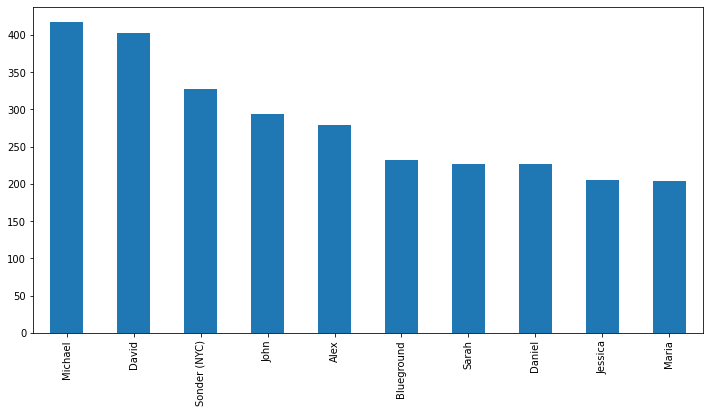

In [ ]:
h=df1['host_name'].value_counts()
plt.figure(figsize=(12,6))
h[0:10].plot.bar()

THESE ARE THE NAME OF THE TOP 10 HOST

In [ ]:
df1.loc[df1['host_name'] == 'Michael', 'neighbourhood_group'].unique()  # Host name with Michael provides the maximum number of Rooms in different neighbour group

array(['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

In [ ]:
count=df1.neighbourhood_group.value_counts()
count

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

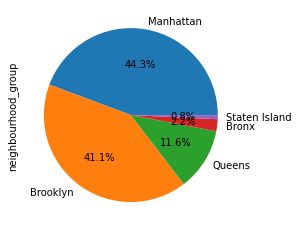

In [ ]:
count.plot(kind="pie",autopct='%0.1f%%')

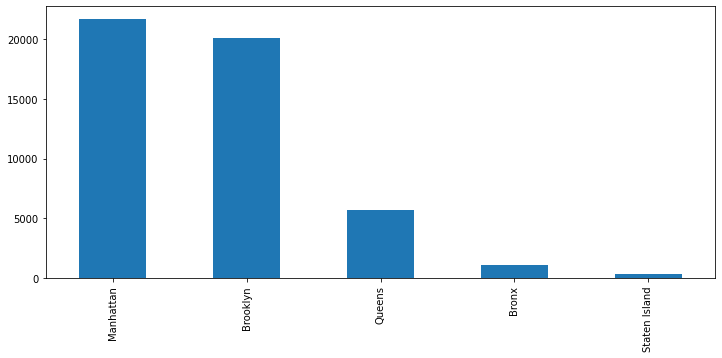

In [ ]:
plt.figure(figsize=(12,5))
count.plot.bar()

THE ABOVE GRAPHICAL REPRESENTATIONS SHOW THAT THE HIGHEST NUMBER OF HOSTS ARE FROM MANHATTAN FOLLWED BY BROOKLY AND ETC. 
THE LEAST NUMBER OF HOSTS ARE FROM STATEN ISLAND

**2.What can we learn from predictions? (ex: locations, prices, reviews, etc)**

Price and Availability

<Figure size 720x360 with 0 Axes>

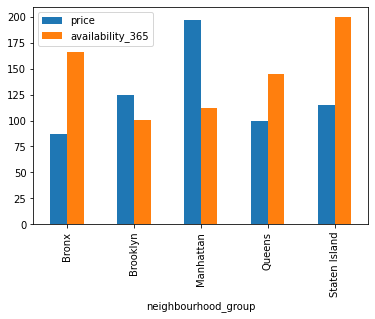

In [ ]:
df1['minimum_price']=df1['minimum_nights']*df1['price']
df1[['minimum_price']].describe()
df2=df1.query('minimum_price == 0')
df2.shape[0]  #There are 11 rows with minimum price as 0
df3=df1.groupby(['neighbourhood_group']).agg({'price':'mean','availability_365':'mean'})#Mean price and mean availability of each neighbourhood group
plt.figure(figsize=(10,5))
df3.plot.bar()

**SO ACCORDING TO THE GRAPH ABOVE, THE AVERAGE PRICE AND AVERAGE AVAILABILITY IN *BRONX*,*QUEENS* AND *STATEN* *ISLAND* SUITED BEST FOR A CUSTOMER WHEREAS IN *BROOKLY* THE AVERAGE PRICE IS MORE AND AVERAGE AVAILABILTY IS THE LEAST AND IN *MANHATTAN* THE AVERAGE PRICE IS THE HIGHEST AND AVERAGE AVAILABILITY IS THE SECOND LEAST**

Reviews Analysis

Text(0.5, 1.0, 'Average price')

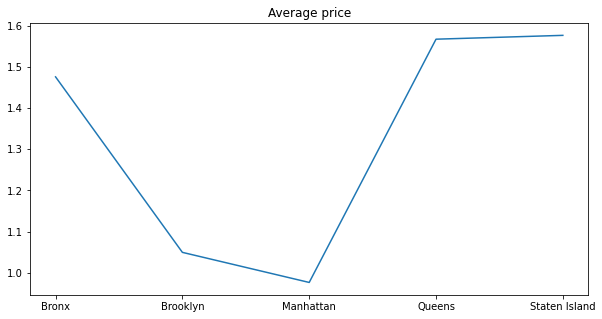

In [ ]:
rev=df1.groupby(['neighbourhood_group']).agg({'reviews_per_month':"mean"})
rev1=rev.sort_values('reviews_per_month', ascending=False)
fig=plt.figure(figsize=(10,5))
plt.title("Average Reviews Per Month")
plt.plot(rev)
plt.title("Average price")

In [ ]:
rev1

,reviews_per_month
neighbourhood_group,
Staten Island,1.576381
Queens,1.567076
Bronx,1.475655
Brooklyn,1.049790
Manhattan,0.976782


AS WE CAN OBSERVE FROM THE ABOVE TABLE AND THE GRAPH THE CUSTOMER REVIEW PER MONTH IS MORE IN STATEN ISLAND FOLLOWED BY QUEENS AND THEN BRONX WHICH MEANS CUSTOMERS ARE MORE INCLINED TOWARDS THESE PLACES AND THE REASON IS THE LOWER AVERAGE PRICE AND HIGHER AVERAGE AVAILABILITY.
MANHATTAN IS THE COSTLIEST AND WITH THE LEAST AVERAGE AVAILABILITY AND IS FOLLOWED BY BROOKLYN.


In [ ]:
df1.groupby(['neighbourhood_group']).agg({'neighbourhood':'items'})#Neighbour hood of Particular neighbourhood group

AttributeError: ignored

In [ ]:
p=df1.groupby(['neighbourhood_group','name']).agg({'availability_365':"min"})
p
# These are the busiest places since the availability is the least

**3.Which hosts are the busiest and why?**

In [ ]:
h=df1['host_name'].value_counts()
plt.figure(figsize=(12,6))
h[0:10].plot.bar() #Host Michael is the busiest follwed by David

In [ ]:
m=df[df1['host_name']=="Michael"]
d=df[df1['host_name']=="David"]
print("Total places hosted by Michael is:",m.shape[0])
print("Total places hosted by David is:",d.shape[0])
#Since Michael and David host more than 400 places they are the busiest

**4.Is there any noticeable difference of traffic among different areas and what could be the reason for it?**

In [ ]:
#find month and year for getting the no. of customers 

6.0     13589
7.0      5937
5.0      4701
1.0      2773
4.0      2109
12.0     1770
8.0      1667
10.0     1546
9.0      1535
3.0      1288
11.0     1158
2.0       770
Name: month, dtype: int64

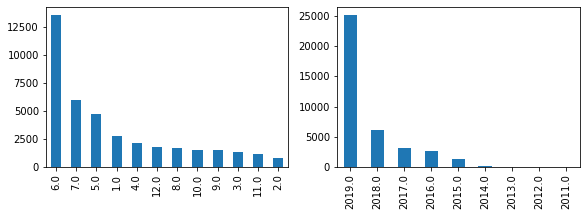

In [ ]:
df['last_review']= pd.to_datetime(df['last_review'])
df['month'] = pd.DatetimeIndex(df['last_review']).month
df['year']=pd.DatetimeIndex(df['last_review']).year
plt.figure(figsize=(20,10))
plt.subplot(341)
df['month'].value_counts().plot.bar()
plt.subplot(342)
df['year'].value_counts().plot.bar()
df['month'].value_counts()

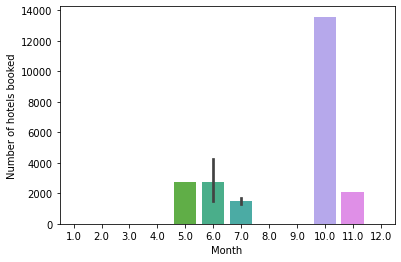

In [ ]:
#To be altered 
sns.barplot(y=df['month'].value_counts(),x=df['month'])
plt.xlabel('Month')
plt.ylabel('Number of hotels booked')
plt.show() 